In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression



In [5]:
quandl.ApiConfig.api_key='-jrXBoMoQk6MxgfxyMr6'

df = quandl.get("WIKI/AAPL")
df=df[['Adj. Close']]
df.head()

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536


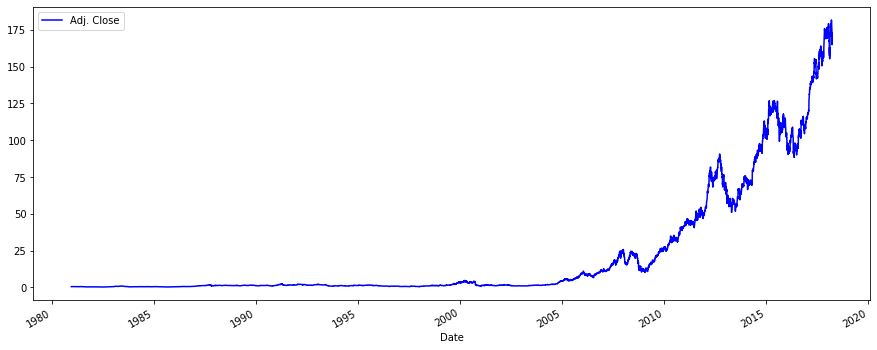

In [6]:
df['Adj. Close'].plot(figsize=(15,6), color = 'b')
plt.legend(loc='upper left')
plt.show()

In [4]:
forecast = 30
df['Prediction']=df[['Adj. Close']].shift(-forecast)

X=np.array(df.drop(['Prediction'],1))
X=preprocessing.scale(X)

X_forecast=X[-forecast:]
X=X[:-forecast]

y=np.array(df['Prediction'])
y=y[:-forecast]

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
forecast_predicted

array([91.88565498, 92.88936619, 94.78412715, 94.10815838, 94.84557886,
       93.58581887, 93.84186765, 96.21800032, 97.61090567, 96.36138763,
       95.92098373, 94.97872423, 95.18356325, 95.78783837, 95.46009593,
       96.01316129, 96.59695251, 98.7580042 , 98.99356908, 96.57646861,
       96.00291934, 96.34090373, 96.77106568, 95.01969203, 95.26549886,
       94.59977203, 91.84468717, 89.17153792, 95.93122568, 91.51694474])

(17282.0, 18233.6)

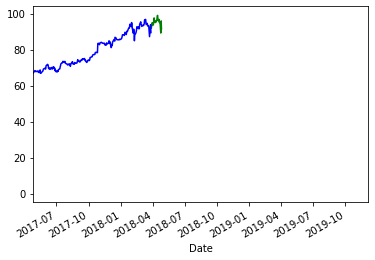

In [45]:
dates = pd.date_range(start="2018-03-28",end="2018-04-26")
plt.plot(dates,forecast_predicted,color = 'g' )
df['Adj. Close'].plot(color = "b")
plt.xlim(xmin = datetime.date(2017,4,26))